# Import libraries

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from random import sample
import math

# Import Dataset

In [94]:
dataset = pd.read_csv("./Dataset/parkinsons_dataset.csv")

dataset.sample(5)

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
284          2   58    0     94.777       12.915       14.957    0.01062   
723          5   75    0     21.340       31.000       39.696    0.00298   
4740        35   71    0    153.530       35.375       53.917    0.00562   
81           1   72    0     54.642       29.929       37.857    0.00486   
2672        20   67    0     11.806       12.199       18.199    0.00935   

      Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
284      0.000091     0.00518      0.00529  ...        0.572       0.03825   
723      0.000028     0.00096      0.00163  ...        0.254       0.01653   
4740     0.000040     0.00278      0.00318  ...        0.351       0.02166   
81       0.000028     0.00219      0.00221  ...        0.196       0.00964   
2672     0.000070     0.00481      0.00501  ...        0.334       0.01726   

      Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
284        0.04016        0.04613      0.11476  0.052697  18.061  0.58530   
723        0.01863        0.02476      0.04959  0.008887  22.615  0.65259   
4740       0.02417        0.03224      0.06499  0.016277  18.643  0.41488   
81         0.01146        0.01992      0.02892  0.017520  24.654  0.46350   
2672       0.01903        0.02952      0.05177  0.027037  23.440  0.50615   

          DFA      PPE  
284   0.79459  0.29090  
723   0.60573  0.14440  
4740  0.71747  0.26480  
81    0.58440  0.22165  
2672  0.81626  0.35760  

[5 rows x 22 columns]

# Split Dataset in 80/20

In [95]:
seed = 42
df = dataset.sample(frac=1, random_state=seed)  # Shuffle the rows
train_size = int(0.8 * len(df))

train_set = df[:train_size]
test_set = df[train_size:]

# Look at Train dataset

In [96]:
train_set.sample(5)

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
272          2   58    0     3.8681      11.0780       14.039    0.00702   
5724        41   68    1   182.5700      34.0120       42.810    0.00653   
1406        10   58    0    52.3540      12.0000       19.000    0.00849   
2453        18   65    0   123.3900       5.6372        7.000    0.00363   
3414        25   76    0    49.4220      26.9950       46.997    0.00333   

      Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
272      0.000054     0.00348      0.00337  ...        0.300       0.01744   
5724     0.000038     0.00300      0.00367  ...        0.291       0.01459   
1406     0.000072     0.00326      0.00346  ...        0.217       0.01017   
2453     0.000029     0.00159      0.00164  ...        0.271       0.01326   
3414     0.000032     0.00179      0.00195  ...        0.227       0.01219   

      Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
272        0.01849        0.02185      0.05232  0.022507  22.414  0.56545   
5724       0.01873        0.03235      0.04376  0.032234  20.356  0.65762   
1406       0.01302        0.01911      0.03051  0.042236  21.067  0.59213   
2453       0.01513        0.02211      0.03979  0.010166  25.602  0.48205   
3414       0.01349        0.01626      0.03656  0.009147  23.502  0.40525   

          DFA      PPE  
272   0.78217  0.21441  
5724  0.67104  0.29369  
1406  0.60524  0.26051  
2453  0.67490  0.12037  
3414  0.61288  0.13455  

[5 rows x 22 columns]

In [97]:
print(train_set.shape)

(4700, 22)


# Look at Test dataset

In [98]:
test_set.sample(5)

subject#  age  sex  test_time  motor_UPDRS  total_UPDRS  Jitter(%)  \
1568        11   55    0     14.516       17.889       20.185    0.00358   
1154         8   73    1     50.609       18.550       24.550    0.00236   
3850        28   74    1     13.367       31.853       41.119    0.01125   
3397        25   76    0    105.370       30.335       49.419    0.00397   
1279         9   68    0     42.346       17.000       23.921    0.01135   

      Jitter(Abs)  Jitter:RAP  Jitter:PPQ5  ...  Shimmer(dB)  Shimmer:APQ3  \
1568     0.000028     0.00165      0.00197  ...        0.181       0.01156   
1154     0.000011     0.00105      0.00101  ...        0.130       0.00627   
3850     0.000058     0.00677      0.00552  ...        0.262       0.01647   
3397     0.000039     0.00186      0.00238  ...        0.355       0.01613   
1279     0.000121     0.00582      0.00597  ...        0.351       0.01825   

      Shimmer:APQ5  Shimmer:APQ11  Shimmer:DDA       NHR     HNR     RPDE  \
1568       0.01337        0.01707      0.03469  0.008323  23.841  0.40425   
1154       0.00751        0.01181      0.01880  0.009389  27.017  0.37366   
3850       0.01580        0.02227      0.04941  0.024745  17.673  0.68453   
3397       0.02236        0.04505      0.04840  0.015037  22.032  0.68265   
1279       0.02254        0.03427      0.05476  0.021867  19.641  0.73021   

          DFA      PPE  
1568  0.66383  0.17460  
1154  0.60713  0.12185  
3850  0.69538  0.24502  
3397  0.58225  0.22356  
1279  0.77394  0.41932  

[5 rows x 22 columns]

In [99]:
print(test_set.shape)

(1175, 22)


Univeriable Linear Regresion

**Feature** - PPE

**Target** - Motor_UDRS



In [100]:
train_x = train_set['PPE']
train_y = train_set['motor_UPDRS']

test_x = test_set['PPE']
test_y = test_set['motor_UPDRS']

## Look at the data

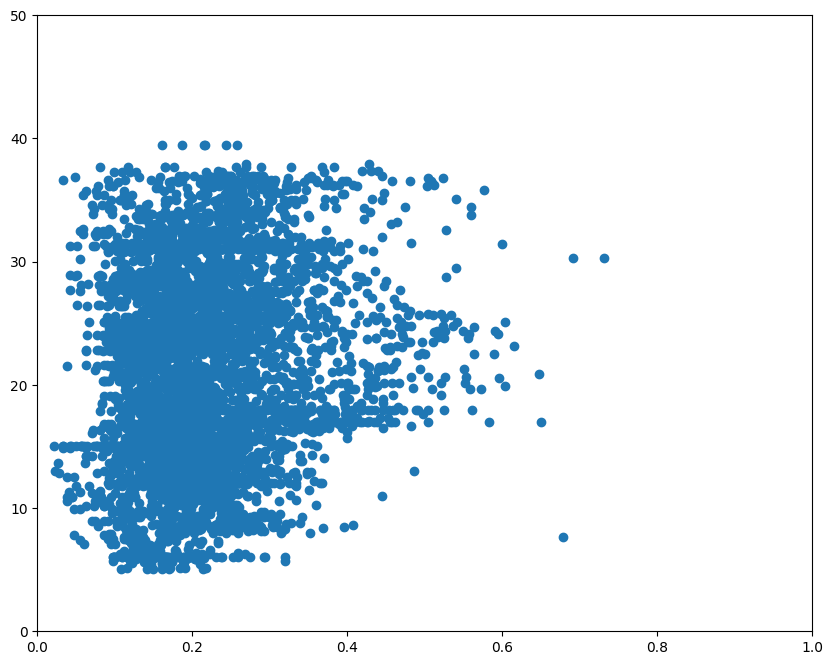

In [101]:
plt.figure(figsize=(10,8))
plt.xlim(0,1)
plt.ylim(0,50)
plt.scatter(train_x,train_y)
plt.show()

# Implement Linear Regression

Implement Linear Regression Class.
It takes the following parameters as input -

**training_x** : Training Dataset Features

**training_y** : Target Dataset Target

**test_x** : Test Dataset Features

**test_y** : Test Dataset Target

**learning_rate** : Learning Rate

**epoch**: Iteration


In [102]:
class Linear_Regression:

  def MSE(self):
    try:
      f = self.W.shape[1]
    except:
      f = 1

    if(f == 1):
      return np.sum( ((((self.W*test_x) + self.b) - self.test_y )**2)/(np.mean(self.test_y.shape[0])) )

    else:
      print("MSE for all", len(self.W[0]) ,"features")
      return np.sum( ((((  np.dot(self.test_x , self.W[0] )) + self.b) - self.test_y )**2)/(np.mean(self.test_y.shape[0])) )

  # Model ~~ (trian_x, train_y, test_x, test_y, learning_rate, Epoch)
  def __init__(self, training_x, training_y, test_x, test_y, learning_rate, epoch):
    self.training_x = training_x
    self.training_y = training_y
    self.test_x = test_x
    self.test_y = test_y
    self.learning_rate = learning_rate
    self.epoch = epoch
    self.costlog = []

    try:
        n = training_x.shape[1]
    except IndexError:
      n=1
    except:
      print("Considering n = 1")

    m = training_x.shape[0]
    print('Rows: ', n, 'Cols', m)

    # Set a default bias
    b = 0

    # Generate Random Weights
    if n == 1:
      W = np.array([10])
    else:
      W = np.random.randn(1, n)

    for each in range(0,self.epoch):
      # Fwd_prop: find y_hat
      Y_hat = np.dot(self.training_x, W[0]) + b

      # Find cost: Calculate Error bwt predicted and actual, consider keeping
      #            log for plotting loss
      j = np.sum(((Y_hat - np.array(train_y))**2.0)) / ( 2.0*m)
      self.costlog.append([each, j])

      # Back_prop: Find the derivatives of change in Weights and Bias
      d_Y_hat = ((1.0/n) * (Y_hat - np.array(self.training_y)))
      d_W = np.dot(d_Y_hat, self.training_x)
      d_b = np.sum(d_Y_hat)

      # Update: Update weights and biases
      W = W - (learning_rate * d_W)
      b = b - (learning_rate * d_b)
      self.W = W
      self.b = b

# Visualize on Test Data

This is a function that takes our Linear Regression object as input and make a scatter plot with each regression line for each feature, in one subplot.

In [103]:
def plot_Linear_Regression(LR_Object: Linear_Regression, n=None):
  if(n == None):
    try:
      total_plot = LR_Object.W[0].shape[0]

    except:
      total_plot = 1

  else:
    total_plot = n

  print(total_plot)

  if(total_plot == 1):
    plt.scatter(LR_Object.test_x , LR_Object.test_y)
    plt.plot(LR_Object.test_x, LR_Object.test_x*LR_Object.W + LR_Object.b, "red")

  elif(total_plot == 2):
    print(LR_Object)
    plt.subplots_adjust(hspace=5, wspace=1)
    fig, axes = plt.subplots(int(total_plot/2), 2, figsize=(9, 5))

    for i, feature in enumerate(LR_Object.test_x.columns):
      sns.scatterplot(x=LR_Object.test_x[feature],
                      y=LR_Object.test_y,
                      ax=axes[i%2])

      sns.scatterplot(x=LR_Object.test_x[feature],
                      y= LR_Object.test_x[feature] * LR_Object.W[0][i] + LR_Object.b,
                      ax=axes[i%2])

  else:
    plt.subplots_adjust(hspace=20, wspace=5)
    fig, axes = plt.subplots(math.ceil(total_plot/2), 2, figsize=(9, 20))

    for i, feature in enumerate(LR_Object.test_x.columns):
      print((i//2), (i%2))
      sns.scatterplot(x=LR_Object.test_x[feature],
                      y=LR_Object.test_y,
                      ax=axes[i//2, i%2])

      sns.scatterplot(x=LR_Object.test_x[feature],
                      y=LR_Object.test_x[feature] * LR_Object.W[0][i] + LR_Object.b,
                      ax=axes[i//2, i%2])



# Create Model

Rows:  1 Cols 4700
Value of W =  13.94227828791651 
Value of Bias = 18.237944083810373
1


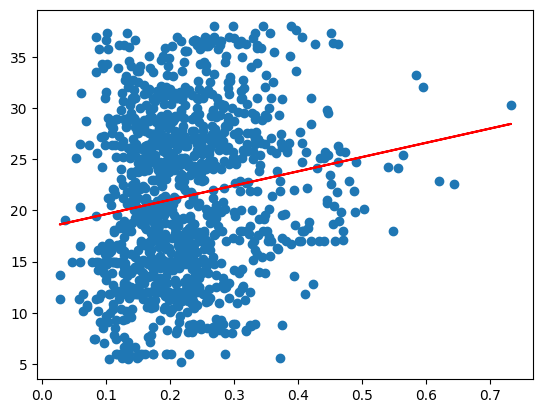

In [104]:
Linear_Model = Linear_Regression(train_x, train_y, test_x, test_y, 0.0001, 500)
print("Value of W = ", Linear_Model.W[0], "\nValue of Bias =", Linear_Model.b)
plot_Linear_Regression(Linear_Model)

# Look at cost function and Measure Error

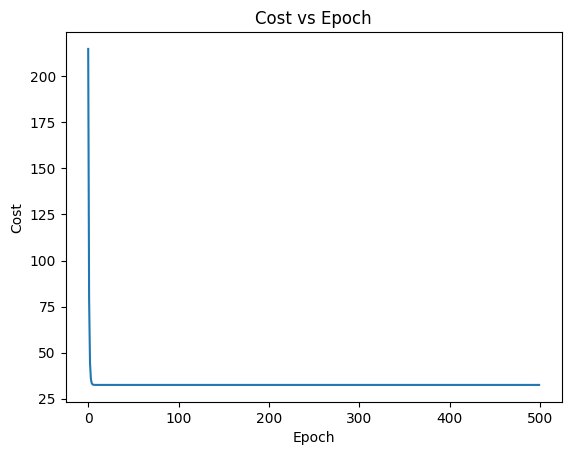

62.25436548732157


In [105]:
cost_log = Linear_Model.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(Linear_Model.MSE())

# Two Variable Linear Regression

**Feature 1:** PPE<br>
**Feature 2:** NHS

**Target:** Motor_UDRS

In [106]:
Two_feature_training_x = train_set[['PPE', "NHR"]]
Two_feature_training_y = train_set['motor_UPDRS']

Two_feature_test_x = test_set[['PPE', 'NHR']]
Two_feature_test_y = test_set['motor_UPDRS']

# Visualize the Data - PPE vs motor_UPDRS

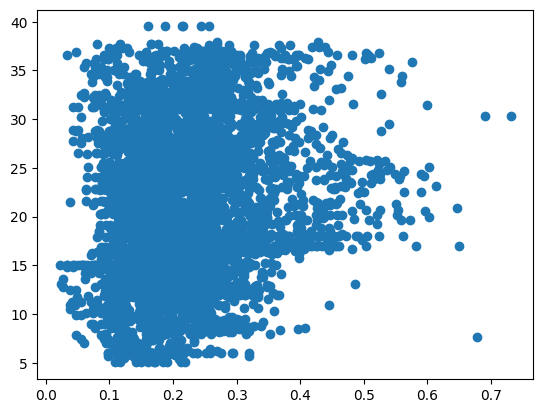

In [107]:
plt.scatter(Two_feature_training_x['PPE'], Two_feature_training_y)

# Visualize the Data - NHR vs motor_UPDRS

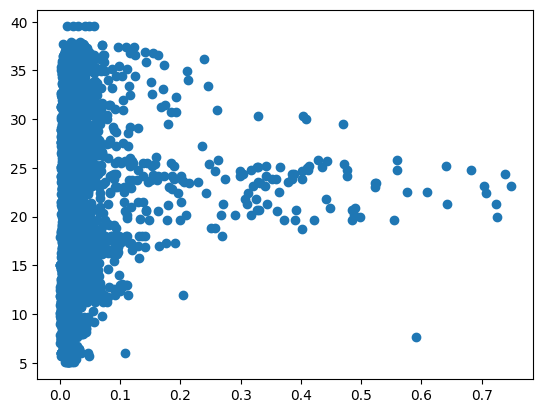

In [108]:
plt.scatter(Two_feature_training_x['NHR'], Two_feature_training_y)

# Implement Two Variable Linear Regression and Visualize - Look at the results

Rows:  2 Cols 4700
2


<Figure size 640x480 with 0 Axes>

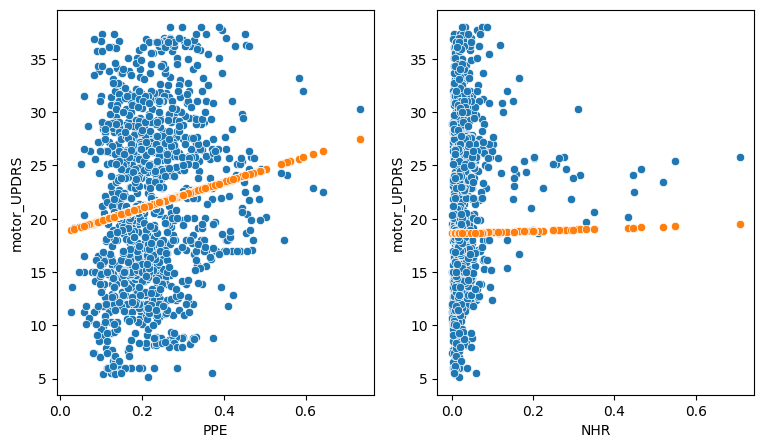

In [109]:
Two_var_Model = Linear_Regression(Two_feature_training_x, Two_feature_training_y, Two_feature_test_x, Two_feature_test_y, 0.0001, 1000)
plot_Linear_Regression(Two_var_Model, 2)

# Look at Cost Function and Measure Error

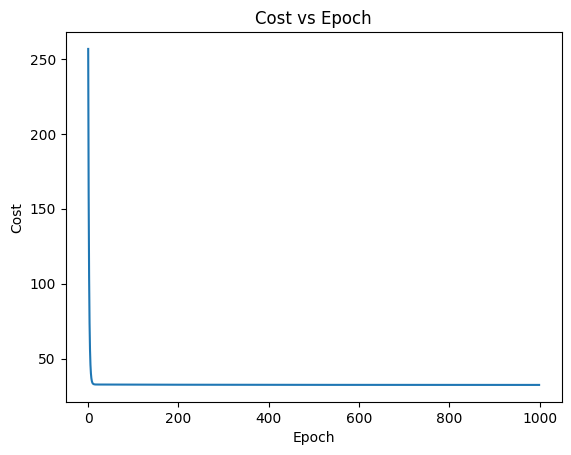

MSE for all 2 features
MES: 62.35562877090269


In [110]:
cost_log = Two_var_Model.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()

print("MES:", Two_var_Model.MSE())

# Forward Stepwise Linear Regression

Making the Dataset

In [111]:
train_set_10F_x = train_set[["age", "Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "HNR", "RPDE", "DFA", "PPE"]]
train_set_10F_y = train_set["motor_UPDRS"]

test_set_10F_x = test_set[["age", "Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "HNR", "RPDE", "DFA", "PPE"]]
test_set_10F_y = test_set["motor_UPDRS"]

# Data Visualization

<Figure size 640x480 with 0 Axes>

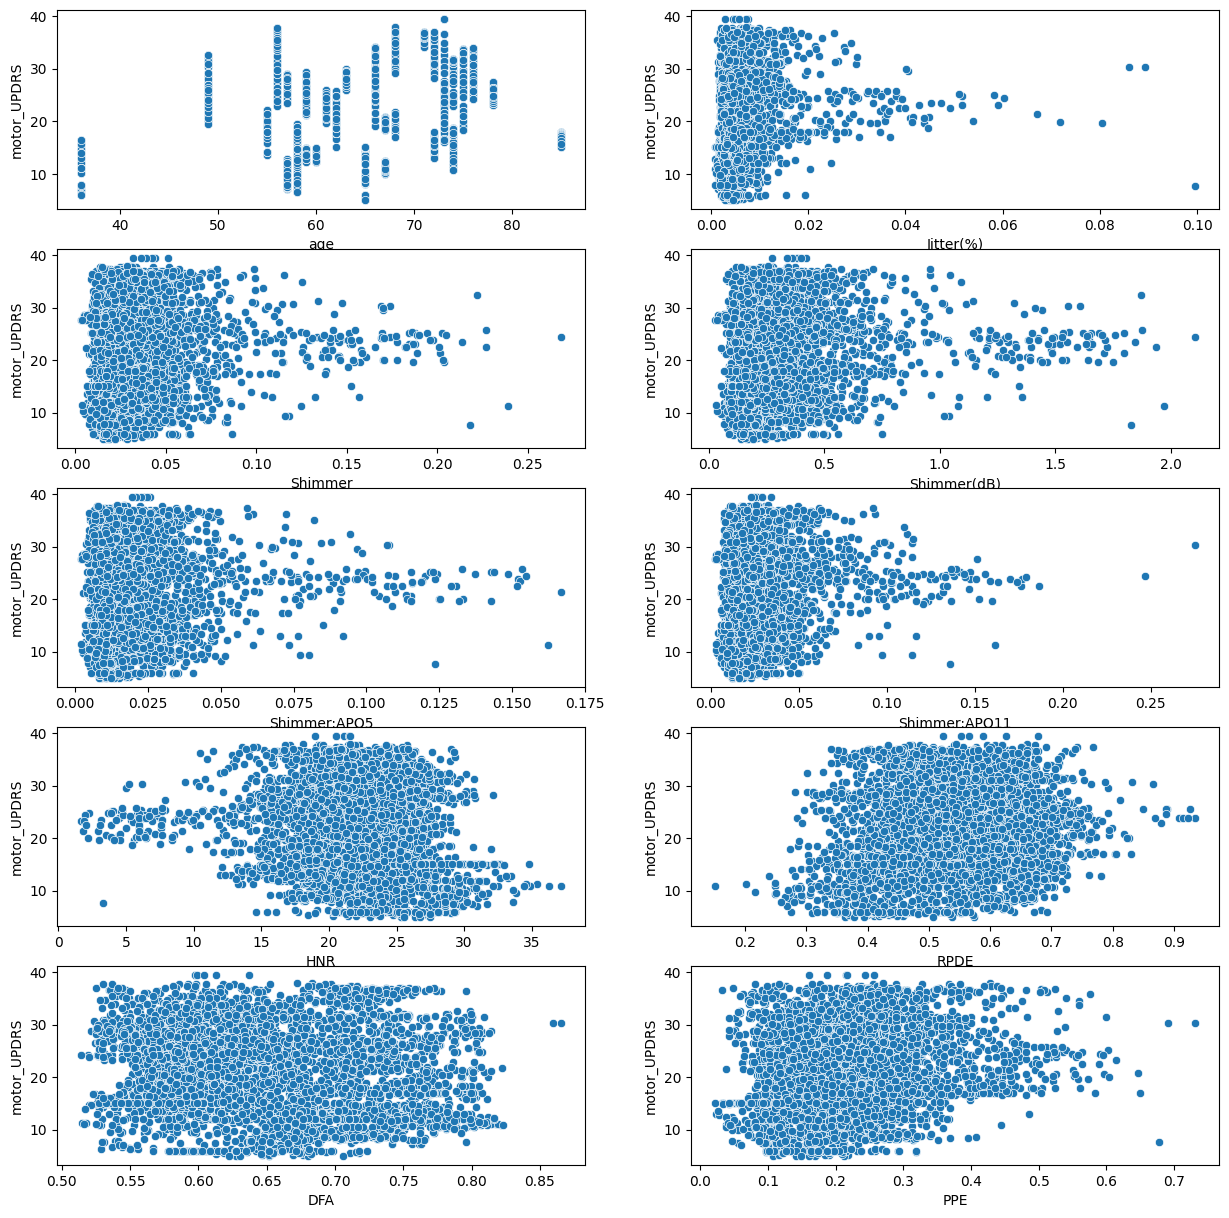

In [112]:
plt.subplots_adjust(hspace=20, wspace=1)
fig, axes = plt.subplots(5, 2, figsize=(15, 15))
for i, feature in enumerate(train_set_10F_x.columns):
    sns.scatterplot(x=train_set_10F_x[feature], y=train_set_10F_y, ax=axes[i // 2, i % 2])

# From Visual Inspection
**RPDE** seems linear

Rows:  1 Cols 4700
1


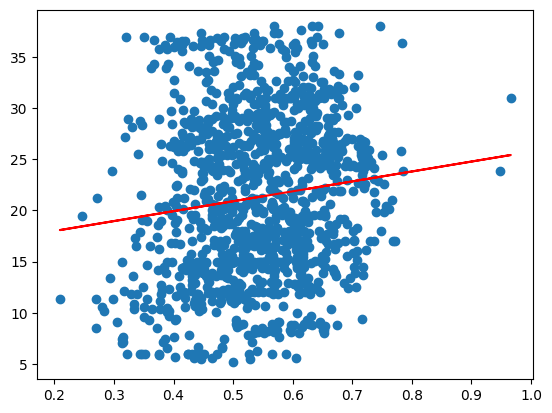

In [113]:
model_1var = Linear_Regression(train_set_10F_x['RPDE'], train_set_10F_y, test_set_10F_x['RPDE'], test_set_10F_y, 0.0001, 1000)
plot_Linear_Regression(model_1var)

# Cost Function and Error

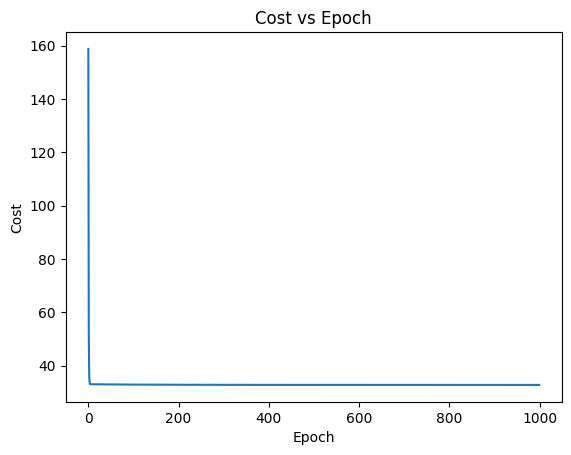

72.35854144135786


In [114]:
cost_log = model_1var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()

print(model_1var.MSE())

# Setting 2nd Variable: PPE

Rows:  2 Cols 4700
2


<Figure size 640x480 with 0 Axes>

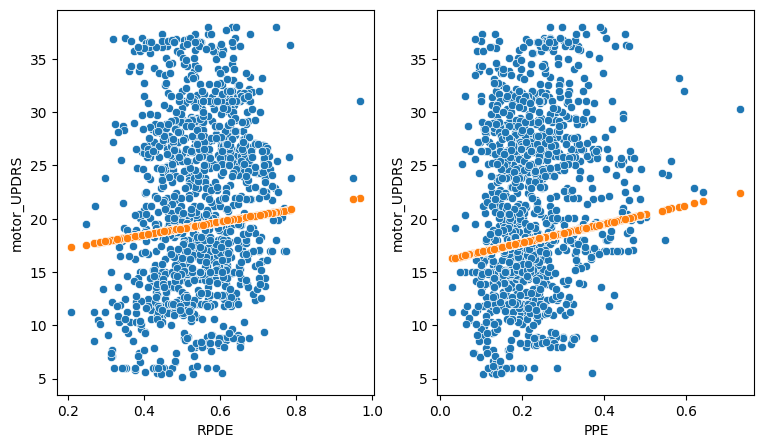

In [115]:
train_fw_sw2 = train_set[['RPDE', 'PPE']]
test_fw_sw2 = test_set[['RPDE', 'PPE']]

model_2var = Linear_Regression(train_fw_sw2, train_set_10F_y, test_fw_sw2, test_set_10F_y, 0.0001, 1000)
plot_Linear_Regression(model_2var)

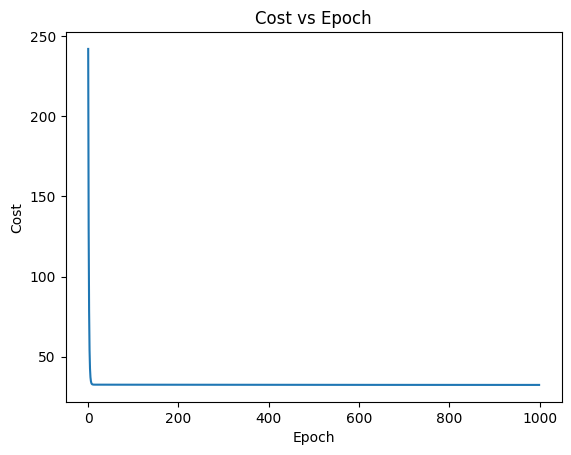

MSE for all 2 features
61.93248799191177


In [116]:
cost_log = model_2var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_2var.MSE())

MSE Become Better!

# Adding 3rd variable - Jitter%

Rows:  3 Cols 4700
3
0 0
0 1
1 0


<Figure size 640x480 with 0 Axes>

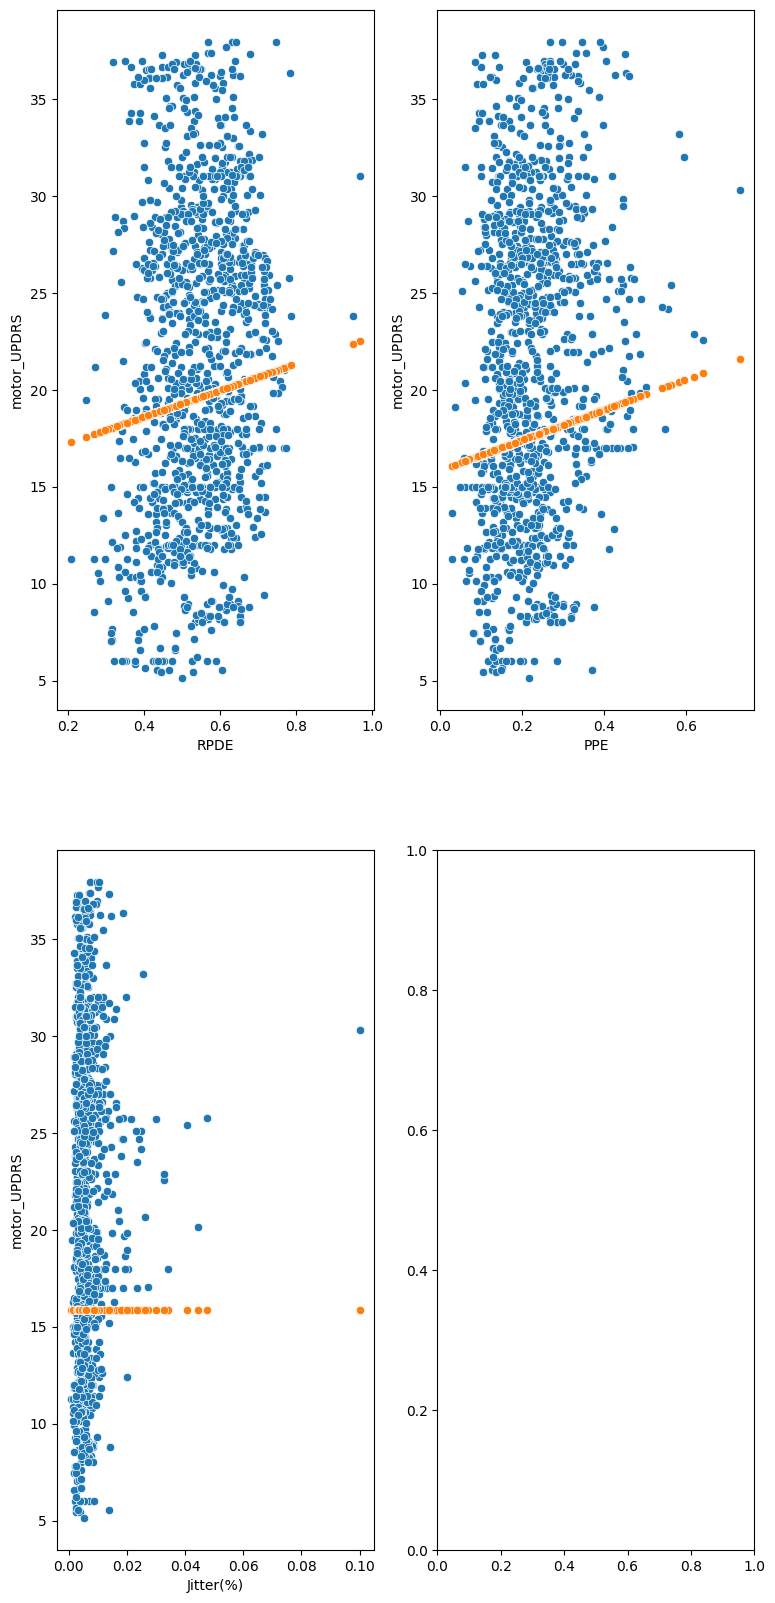

In [117]:
train_fw_sw3 = train_set[['RPDE', 'PPE', 'Jitter(%)']]
test_fw_sw3 = test_set[['RPDE', 'PPE', 'Jitter(%)']]

model_3var = Linear_Regression(train_fw_sw3, train_set_10F_y, test_fw_sw3, test_set_10F_y, 0.0001, 1000)
plot_Linear_Regression(model_3var)

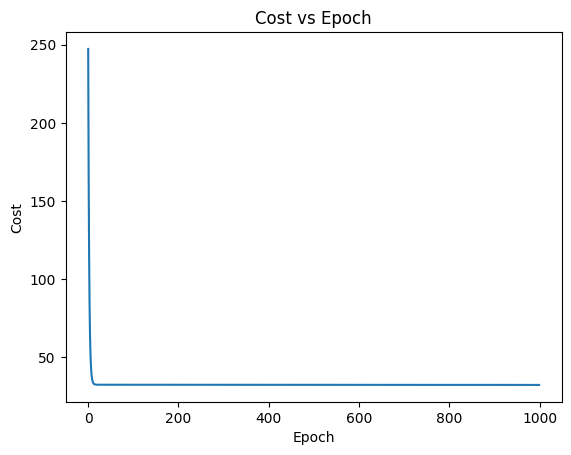

MSE for all 3 features
61.95533302146858


In [118]:
cost_log = model_3var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_3var.MSE())

# Adding: Shimmer

Rows:  4 Cols 4700
4
0 0
0 1
1 0
1 1


<Figure size 640x480 with 0 Axes>

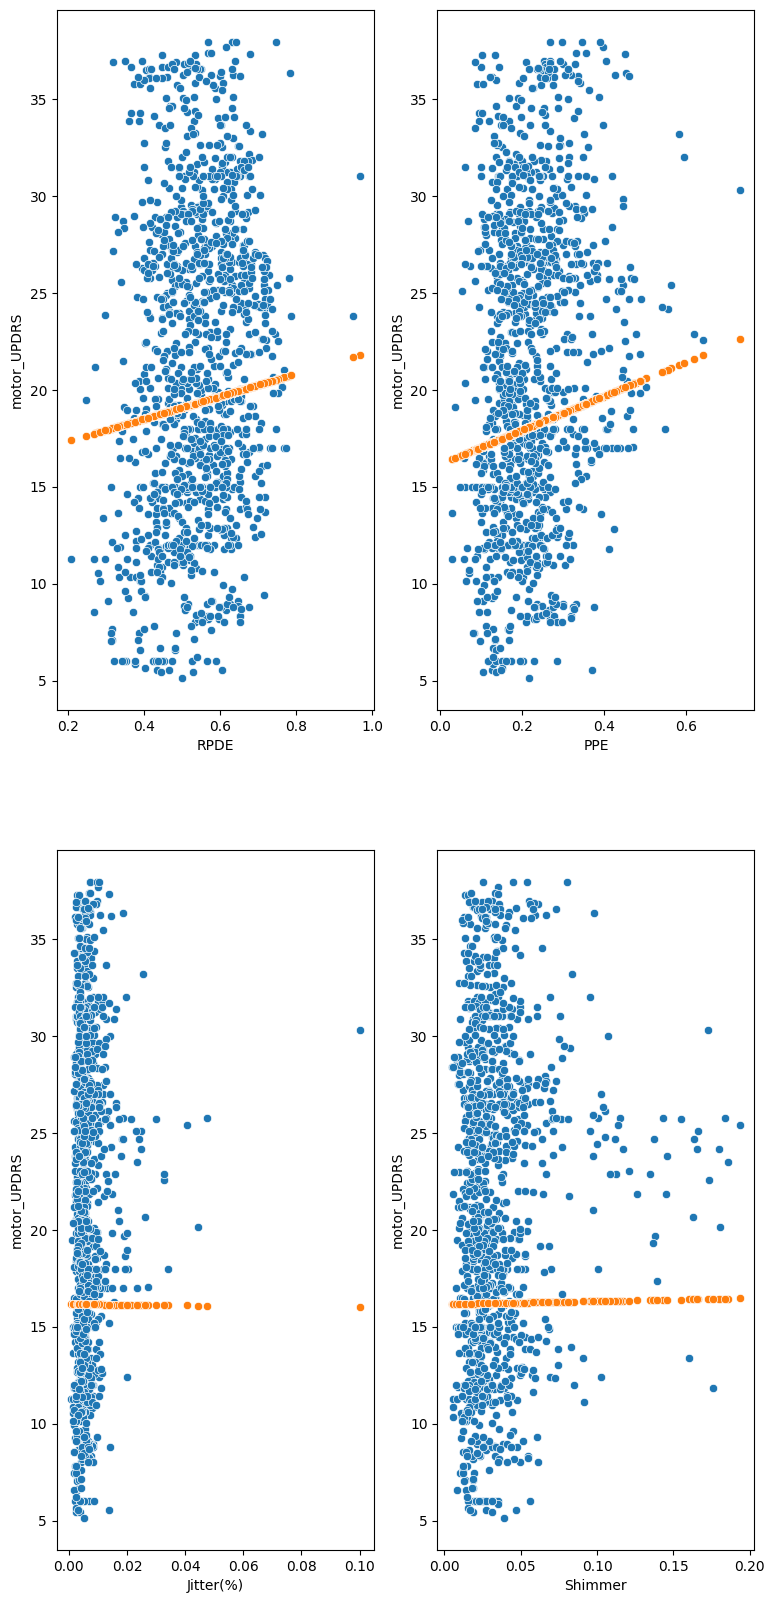

In [119]:
train_fw_sw4 = train_set[['RPDE', 'PPE', 'Jitter(%)', 'Shimmer']]
test_fw_sw4 = test_set[['RPDE', 'PPE', 'Jitter(%)', 'Shimmer']]

model_4var = Linear_Regression(train_fw_sw4, train_set_10F_y, test_fw_sw4, test_set_10F_y, 0.0001, 2000)
plot_Linear_Regression(model_4var)

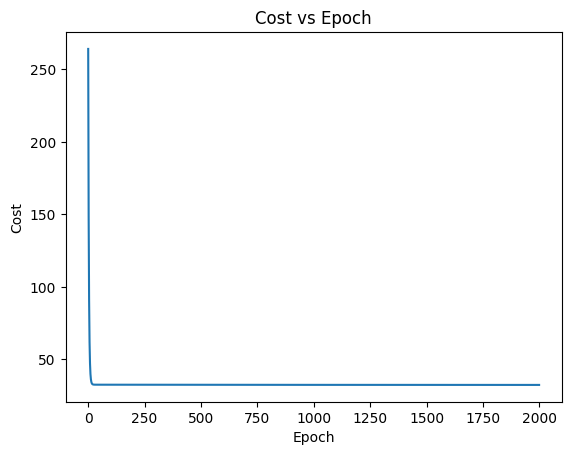

MSE for all 4 features
61.94800637973099


In [120]:
cost_log = model_4var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_4var.MSE())

Almost same as before.

Adding a new feature


# Trying an new feature to see if anything changes - Add Shimmer:APQ5

Rows:  5 Cols 4700
5
0 0
0 1
1 0
1 1
2 0


<Figure size 640x480 with 0 Axes>

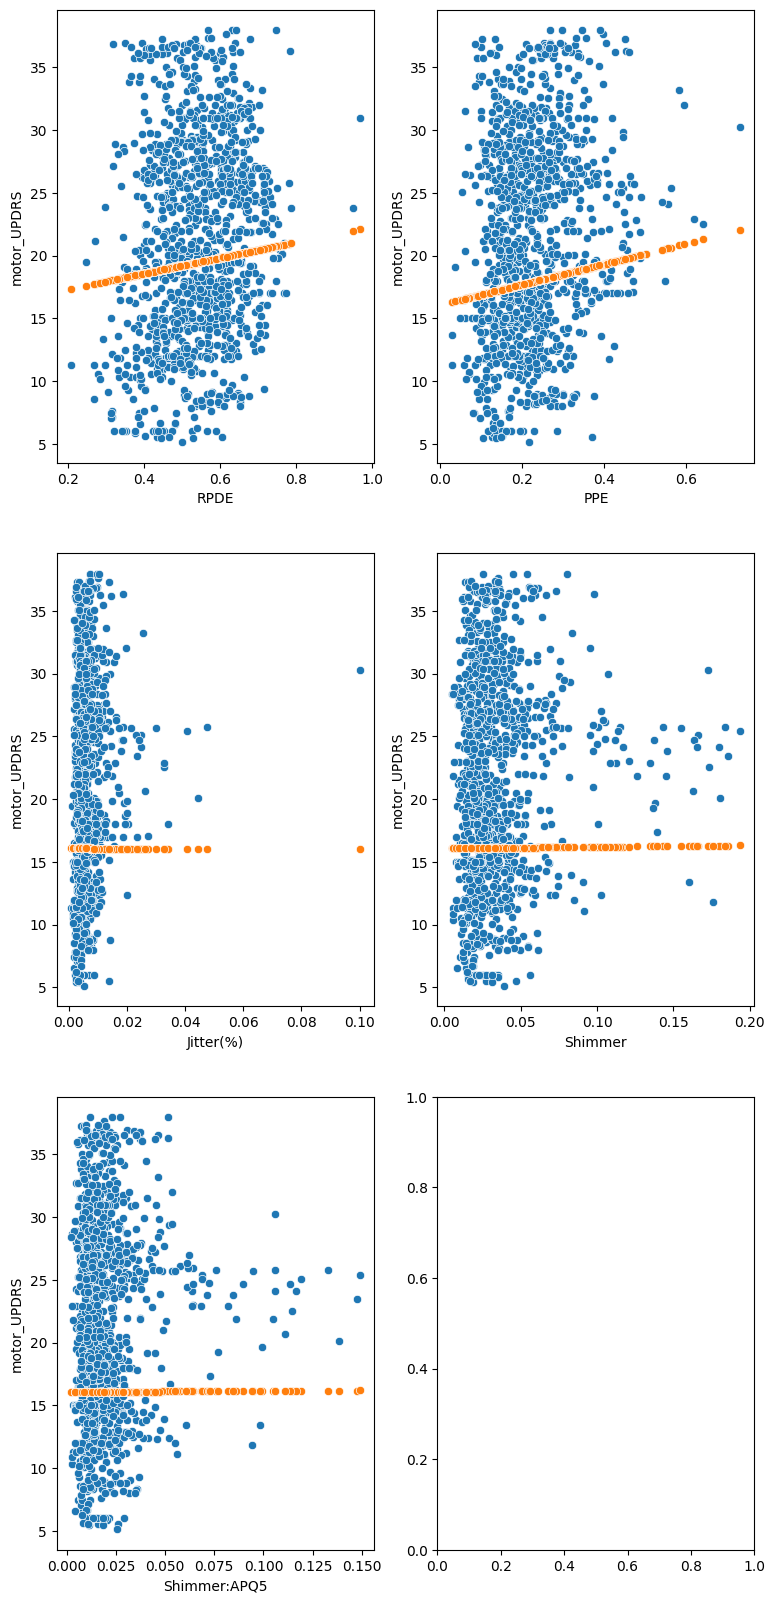

In [121]:
train_fw_sw5 = train_set[['RPDE', 'PPE', 'Jitter(%)', 'Shimmer', 'Shimmer:APQ5']]
test_fw_sw5 = test_set[['RPDE', 'PPE', 'Jitter(%)', 'Shimmer', 'Shimmer:APQ5']]

model_5var = Linear_Regression(train_fw_sw5, train_set_10F_y, test_fw_sw5, test_set_10F_y, 0.0001, 2000)
plot_Linear_Regression(model_5var)

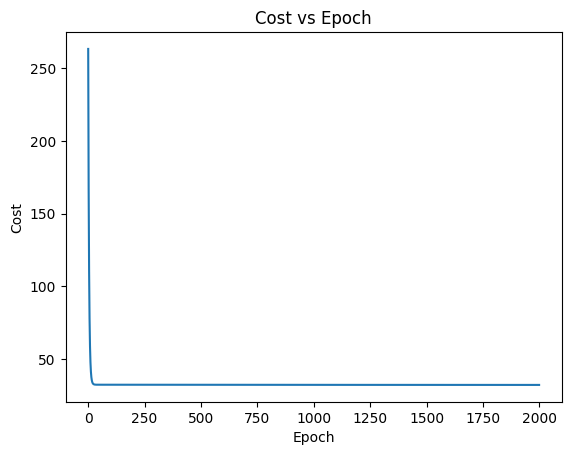

MSE for all 5 features
61.96643842091072


In [122]:
cost_log = model_5var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_5var.MSE())

**Shimmer:APQ5** doesn't give drastically better results. So, choosing another feature.

Back to 61.9 again, but this is as good as it gets.

# Backwards Stepwise

Starting with all 10 features

Rows:  10 Cols 4700
10
0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0
4 1


<Figure size 640x480 with 0 Axes>

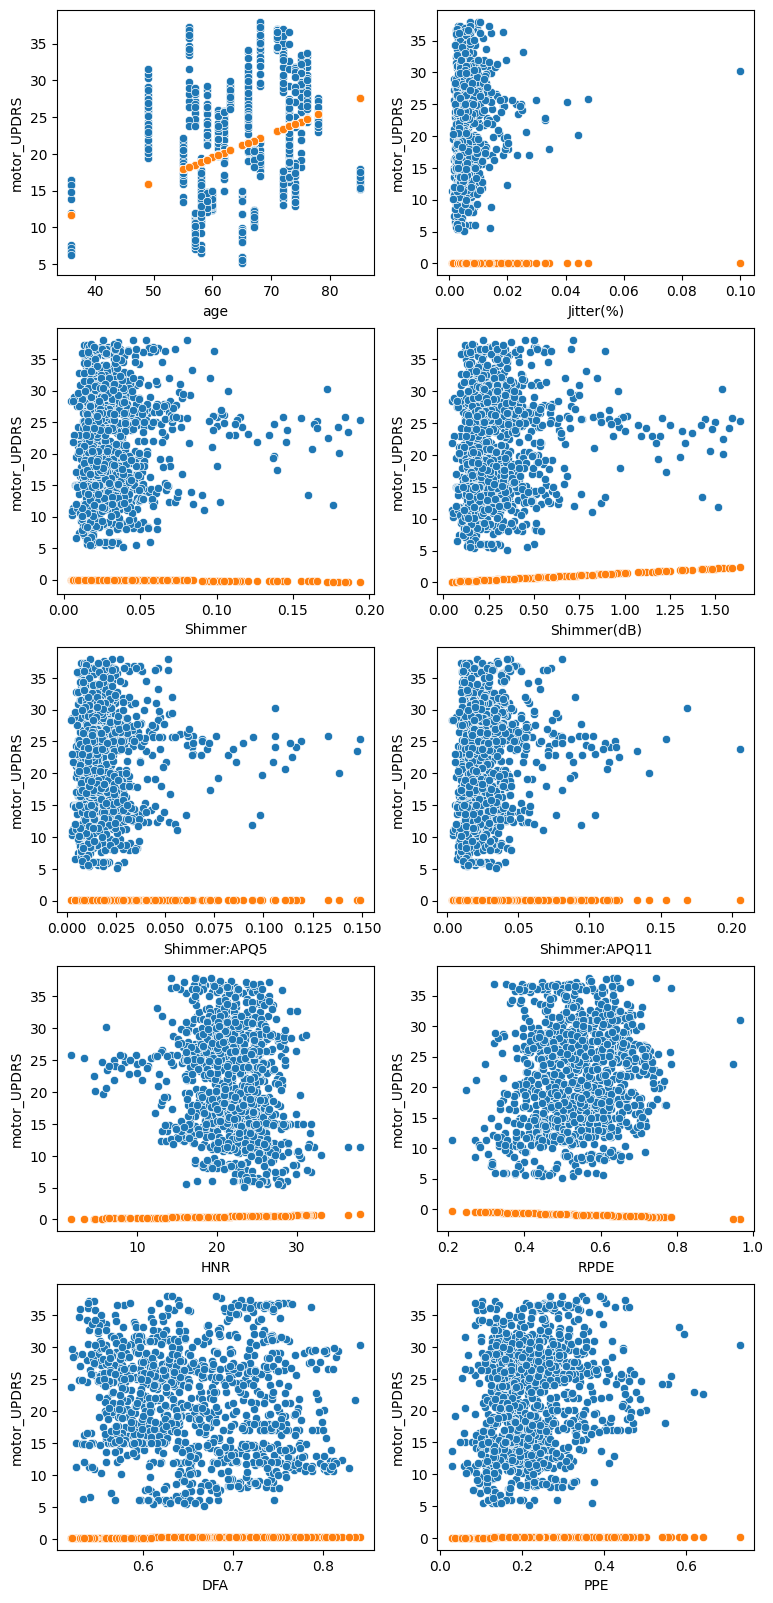

In [123]:
train_fw_sw10 = train_set[["age", "Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "HNR", "RPDE", "DFA", "PPE"]]
test_fw_sw10 = test_set[["age", "Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "HNR", "RPDE", "DFA", "PPE"]]

model_10var = Linear_Regression(train_fw_sw10, train_set_10F_y, test_fw_sw10, test_set_10F_y, 0.0000001, 2000)
plot_Linear_Regression(model_10var)

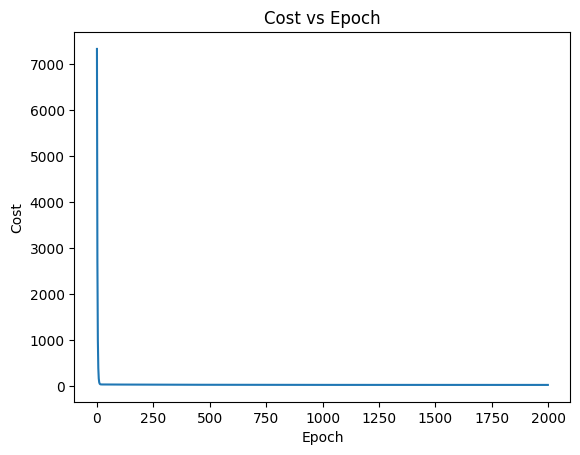

MSE for all 10 features
61.10676654009794


In [124]:
cost_log = model_10var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_10var.MSE())

Though this gives best result but the model seems it only learned one feature and whole prediction is based on that feature / age.

# Removing Age

Rows:  9 Cols 4700
9
0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1
4 0


<Figure size 640x480 with 0 Axes>

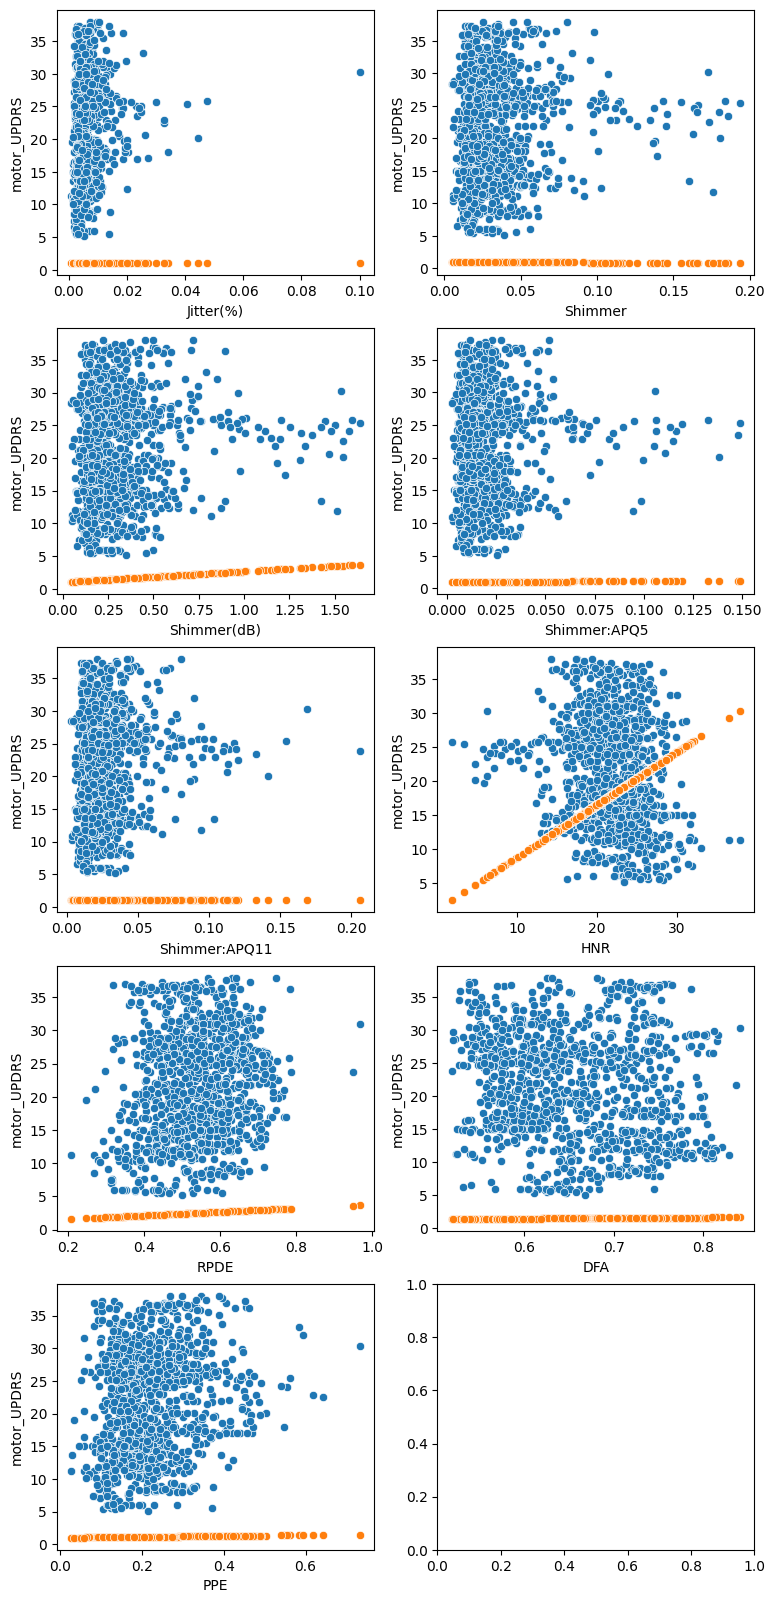

In [125]:
train_fw_sw9 = train_set[["Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "HNR", "RPDE", "DFA", "PPE"]]
test_fw_sw9 = test_set[["Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "HNR", "RPDE", "DFA", "PPE"]]

model_9var = Linear_Regression(train_fw_sw9, train_set_10F_y, test_fw_sw9, test_set_10F_y, 0.000001, 2000)
plot_Linear_Regression(model_9var)

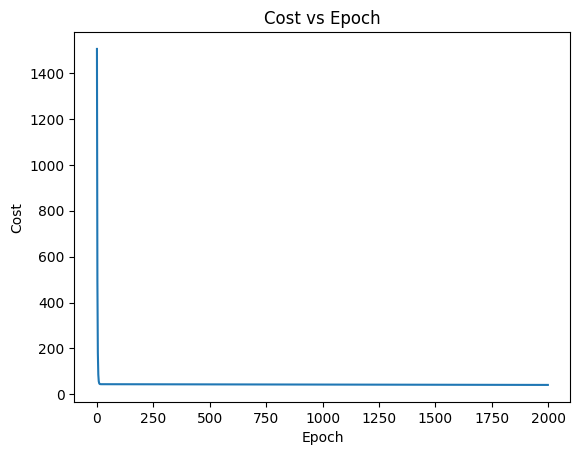

MSE for all 9 features
80.30198082450462


In [126]:
cost_log = model_9var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_9var.MSE())

Looking at the regression lines, HNR dominates too much for which others do not seem to learn. So we need to remove HNR

# Removing HNR

Rows:  8 Cols 4700
8
0 0
0 1
1 0
1 1
2 0
2 1
3 0
3 1


<Figure size 640x480 with 0 Axes>

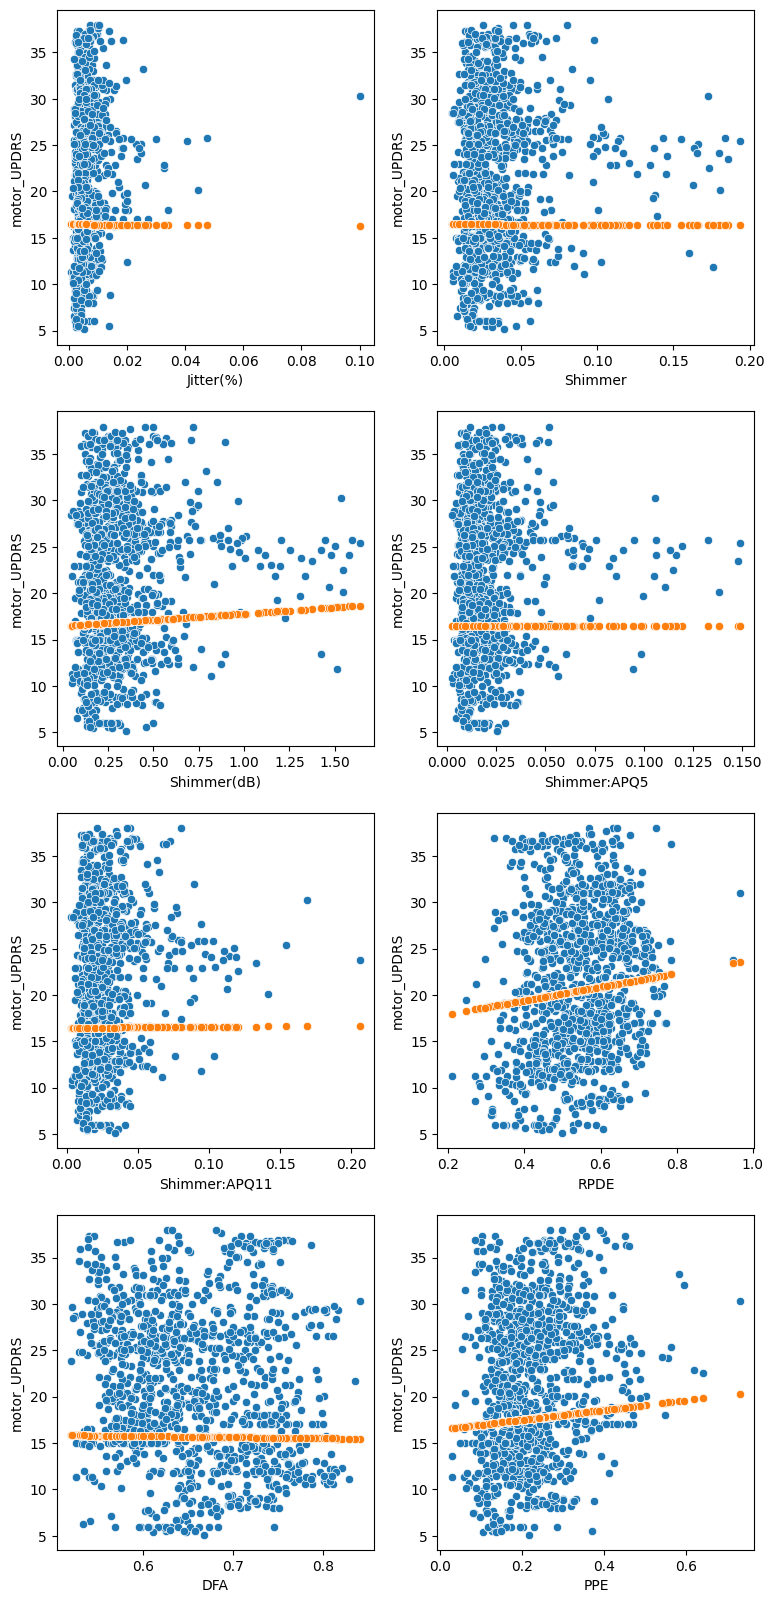

In [127]:
train_fw_sw8 = train_set[["Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "RPDE", "DFA", "PPE"]]
test_fw_sw8 = test_set[["Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "RPDE", "DFA", "PPE"]]

model_8var = Linear_Regression(train_fw_sw8, train_set_10F_y, test_fw_sw8, test_set_10F_y, 0.0001, 2000)
plot_Linear_Regression(model_8var)

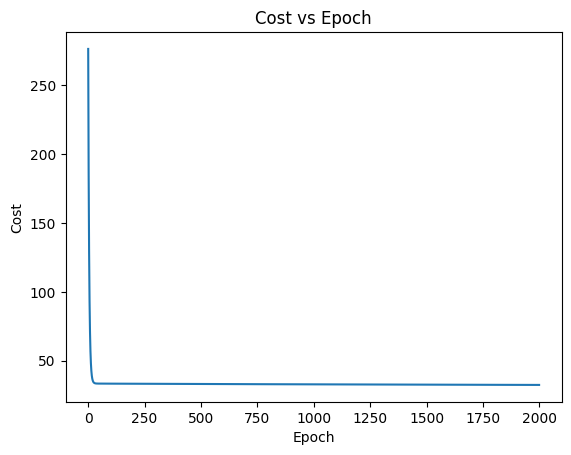

MSE for all 8 features
61.862631227516005


In [128]:
cost_log = model_8var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_8var.MSE())

Model is performing better.

# Removing RPDE

Rows:  7 Cols 4700
7
0 0
0 1
1 0
1 1
2 0
2 1
3 0


<Figure size 640x480 with 0 Axes>

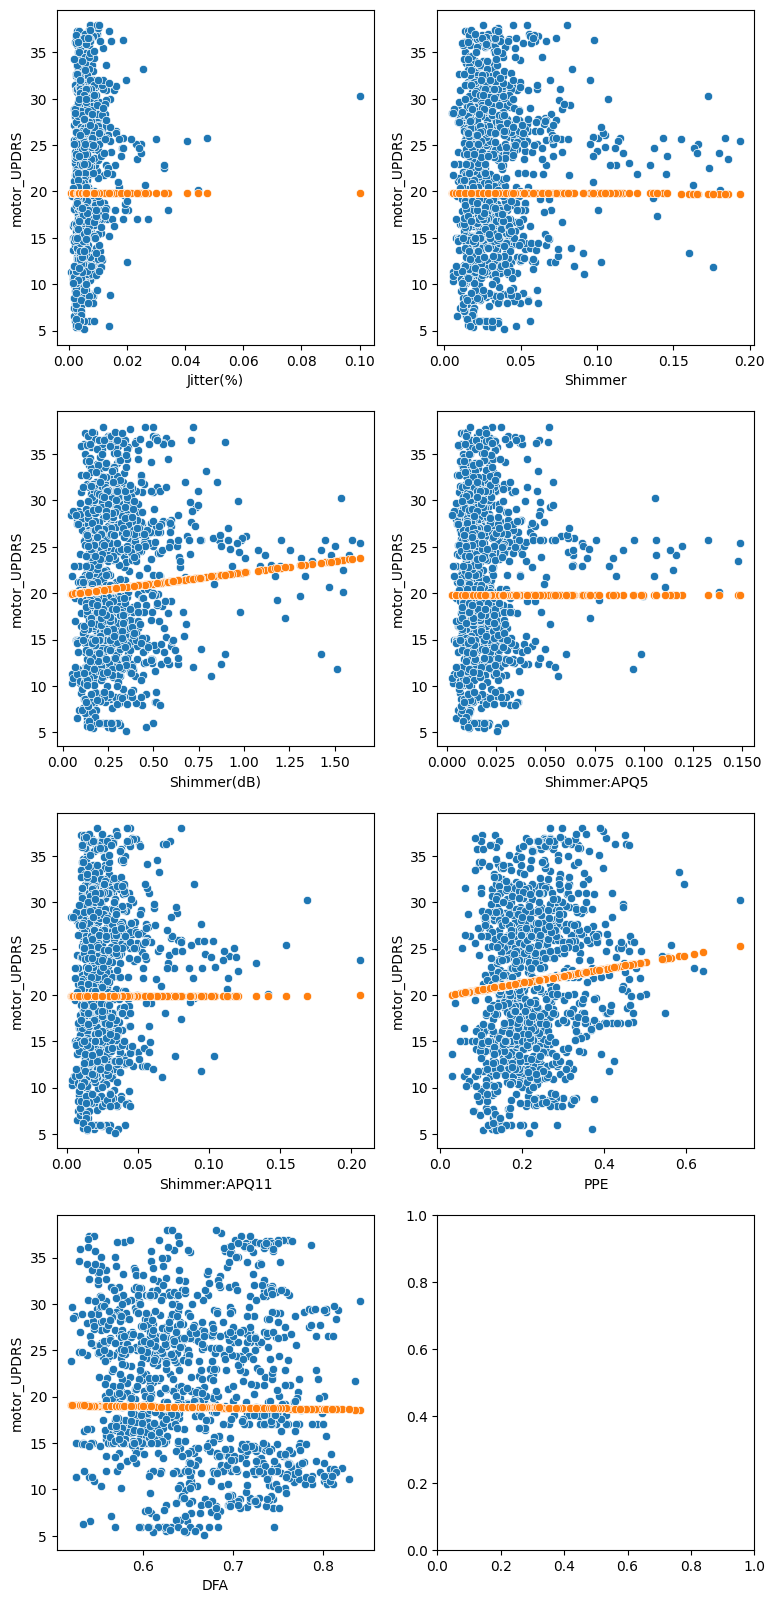

In [129]:
train_fw_sw7 = train_set[["Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "PPE", "DFA"]]
test_fw_sw7 = test_set[["Jitter(%)", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "PPE", "DFA"]]

model_7var = Linear_Regression(train_fw_sw7, train_set_10F_y, test_fw_sw7, test_set_10F_y, 0.0001, 2000)
plot_Linear_Regression(model_7var)

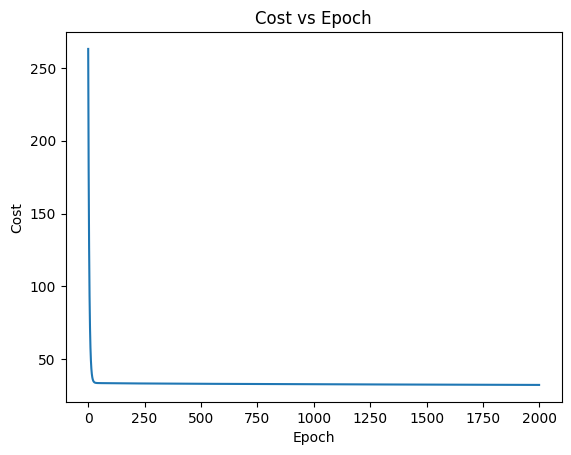

MSE for all 7 features
62.40008018803869


In [130]:
cost_log = model_7var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_7var.MSE())

Accurecy look betters.

# Removing - Jitter
Visually, it seems to be contributing to higher error

Rows:  6 Cols 4700
6
0 0
0 1
1 0
1 1
2 0
2 1


<Figure size 640x480 with 0 Axes>

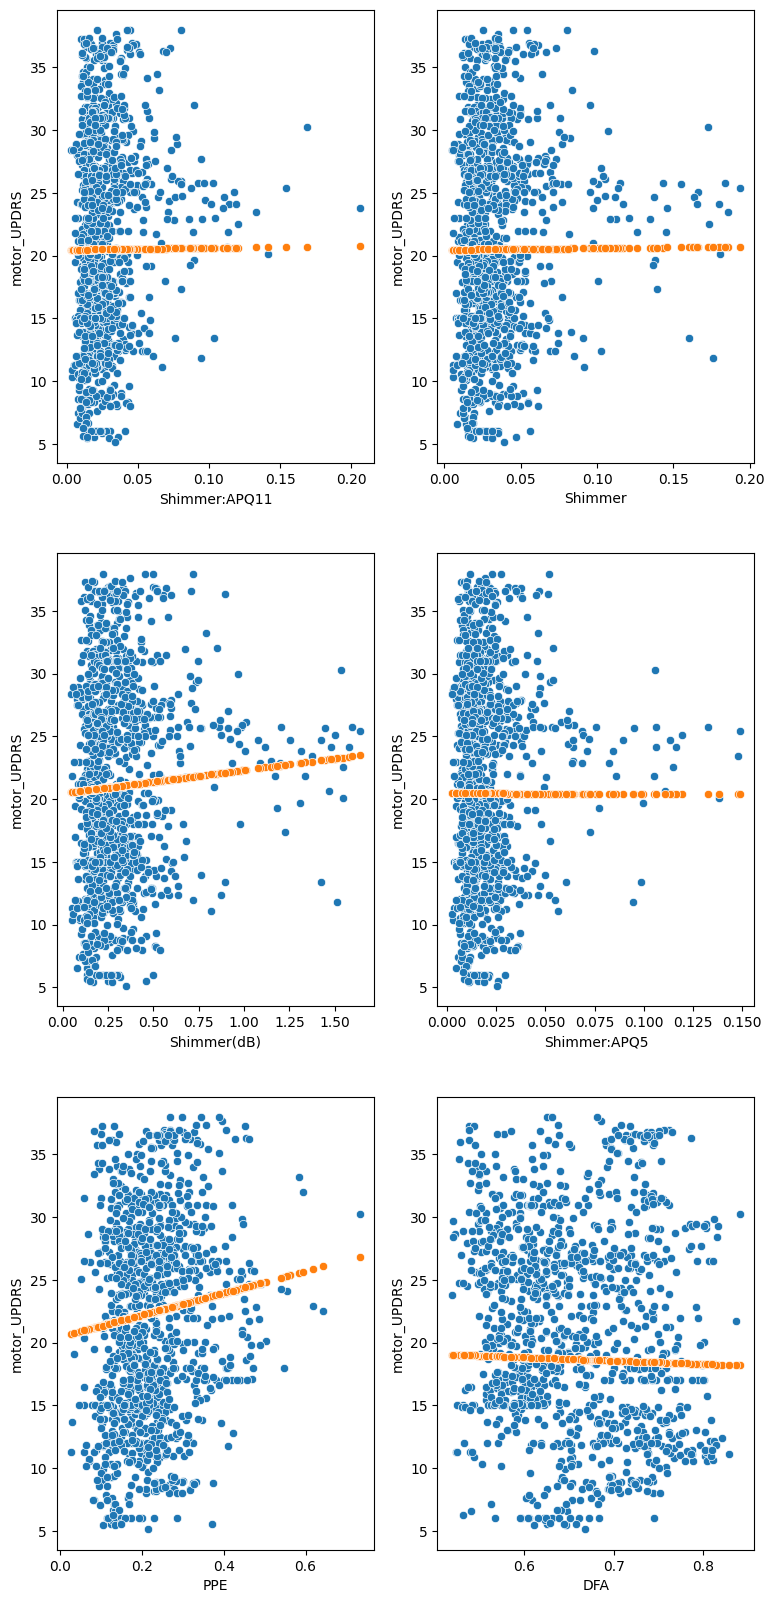

In [131]:
train_fw_sw6 = train_set[["Shimmer:APQ11", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "PPE", "DFA"]]
test_fw_sw6 = test_set[["Shimmer:APQ11", "Shimmer", "Shimmer(dB)", "Shimmer:APQ5", "PPE", "DFA"]]

model_6var = Linear_Regression(train_fw_sw6, train_set_10F_y, test_fw_sw6, test_set_10F_y, 0.0001, 2000)
plot_Linear_Regression(model_6var)

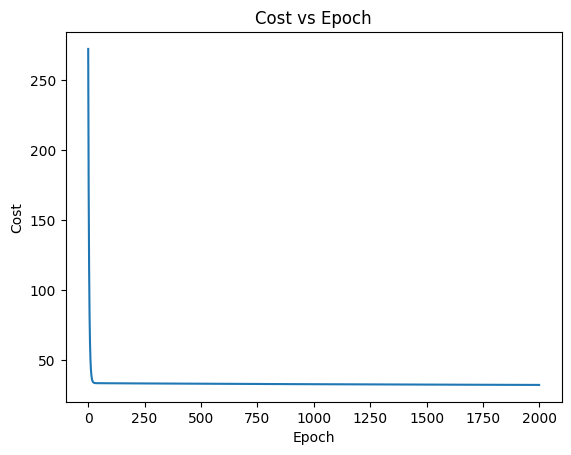

MSE for all 6 features
62.03608987402987


In [132]:
cost_log = model_6var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_6var.MSE())

# Removing - Shimmer

Rows:  5 Cols 4700
5
0 0
0 1
1 0
1 1
2 0


<Figure size 640x480 with 0 Axes>

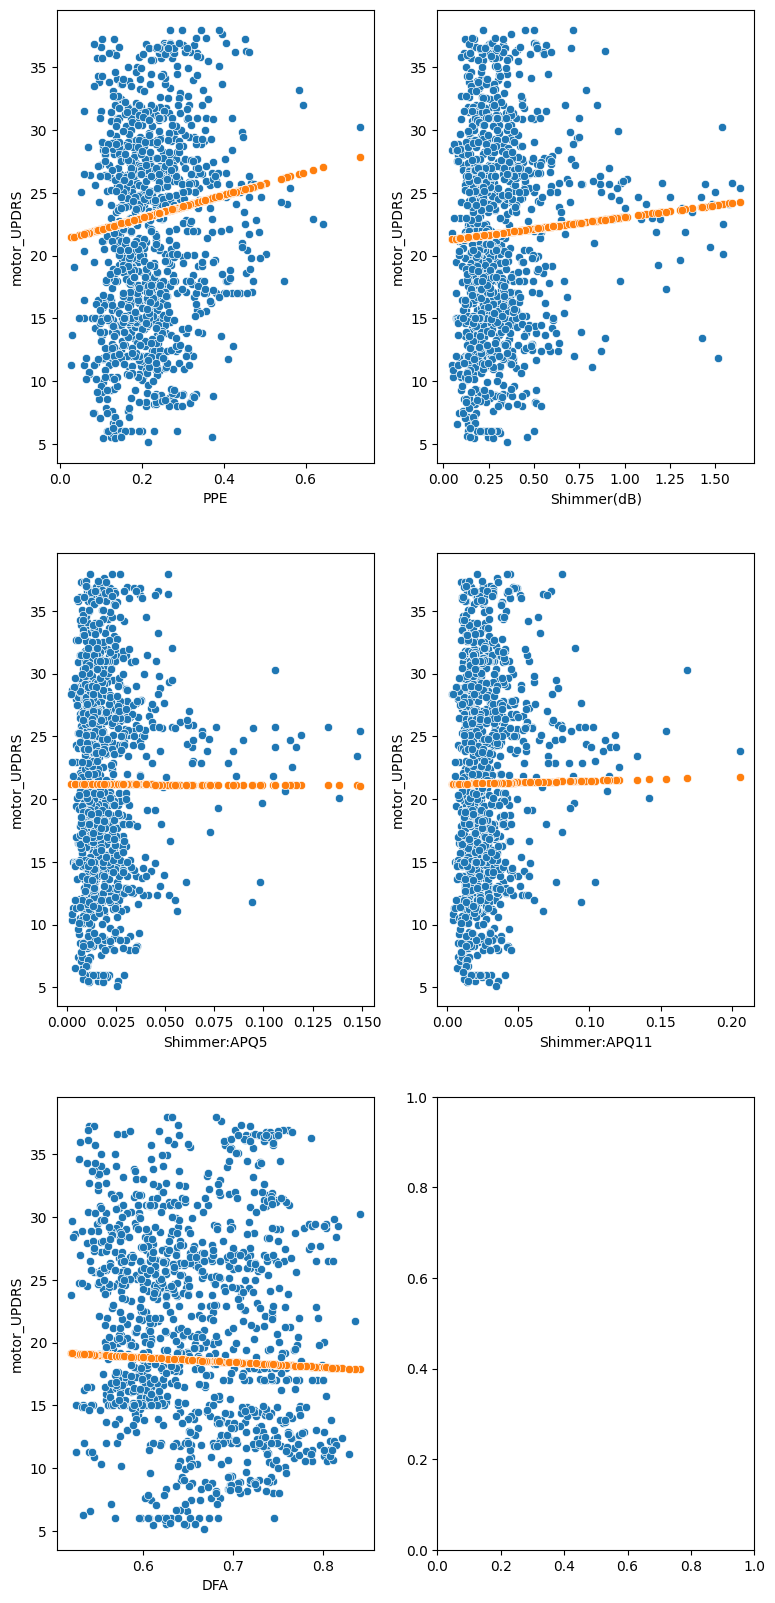

In [133]:
train_fw_sw5 = train_set[["PPE", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "DFA"]]
test_fw_sw5 = test_set[["PPE", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "DFA"]]

model_5var = Linear_Regression(train_fw_sw5, train_set_10F_y, test_fw_sw5, test_set_10F_y, 0.0001, 2000) # 0.0025 5k best
plot_Linear_Regression(model_5var)

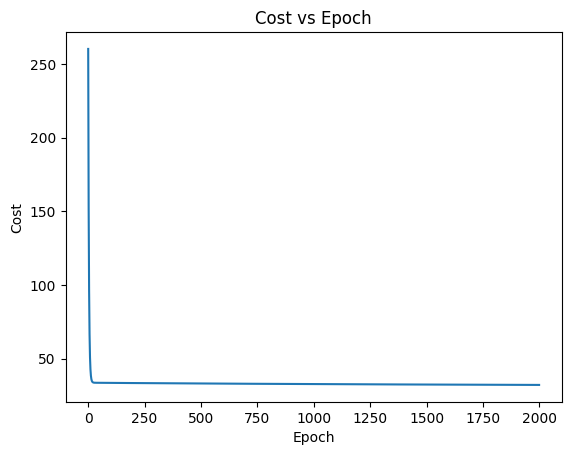

MSE for all 5 features
61.77649267247314


In [134]:
cost_log = model_5var.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(model_5var.MSE())

# Implementing Feature Scaling (Normalization)

In [135]:
train_Full_scale = train_set[["PPE", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "DFA"]]
test_Full_scale = test_set[["PPE", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "DFA"]]

train_scaled = train_set[["PPE", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "DFA"]]
test_scaled = test_set[["PPE", "Shimmer(dB)", "Shimmer:APQ5", "Shimmer:APQ11", "DFA"]]

for each in train_Full_scale.columns:
  fmin = train_Full_scale[each].min()
  fmax = train_Full_scale[each].max()
  train_scaled[each] = ((train_Full_scale[each] - fmin)/(fmax-fmin))

for each in test_Full_scale.columns:
  fmin = test_Full_scale[each].min()
  fmax = test_Full_scale[each].max()
  test_scaled[each] = ((test_Full_scale[each] - fmin)/(fmax-fmin))

C:\Users\PC\AppData\Local\Temp\ipykernel_10492\3617788422.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_scaled[each] = ((train_Full_scale[each] - fmin)/(fmax-fmin))
C:\Users\PC\AppData\Local\Temp\ipykernel_10492\3617788422.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_scaled[each] = ((test_Full_scale[each] - fmin)/(fmax-fmin))


In [136]:
train_scaled.sample(5)

PPE  Shimmer(dB)  Shimmer:APQ5  Shimmer:APQ11       DFA
278   0.305773     0.301297      0.277926       0.195443  0.569263
3715  0.225692     0.061028      0.055125       0.040188  0.550119
1974  0.189584     0.012494      0.004362       0.004616  0.107265
752   0.329070     0.177319      0.147928       0.094846  0.334168
4481  0.319162     0.121096      0.098013       0.077261  0.099499

In [137]:
test_scaled.sample(5)

PPE  Shimmer(dB)  Shimmer:APQ5  Shimmer:APQ11       DFA
4300  0.194072     0.110063      0.066353       0.075056  0.310164
2336  0.185537     0.088679      0.052495       0.046632  0.266972
2237  0.382378     0.193711      0.146972       0.134222  0.502865
492   0.221511     0.213208      0.159874       0.153911  0.550137
2198  0.264103     0.259119      0.202744       0.171774  0.651781

Rows:  5 Cols 4700
5
0 0
0 1
1 0
1 1
2 0


<Figure size 640x480 with 0 Axes>

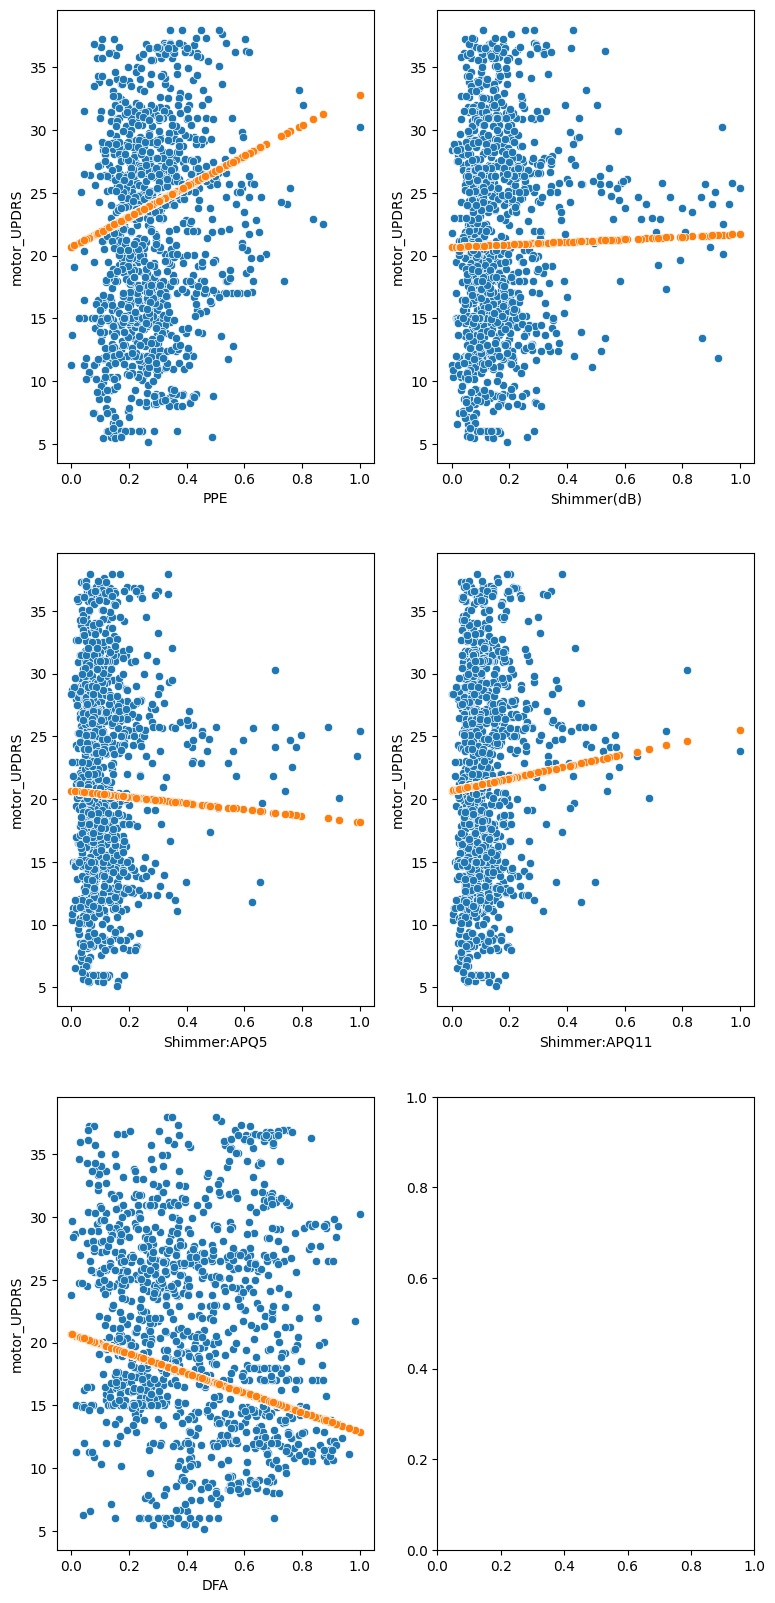

In [138]:
F_scaled_model = Linear_Regression(train_scaled, train_set_10F_y, test_scaled, test_set_10F_y, 0.0001, 2000)
plot_Linear_Regression(F_scaled_model)

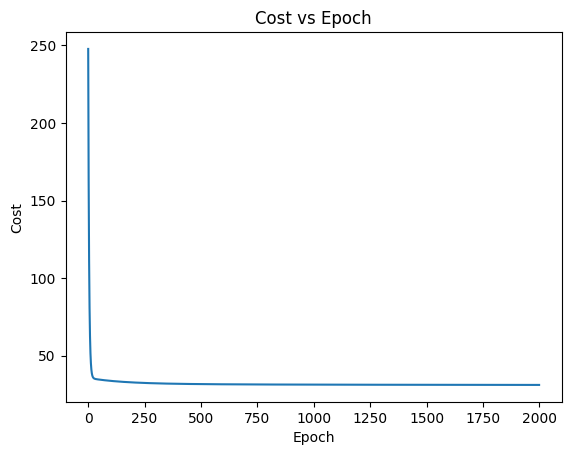

MSE for all 5 features
59.13982234138459


In [139]:
cost_log = F_scaled_model.costlog

x = [i[0] for i in cost_log]
y = [i[1] for i in cost_log]

plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch")
plt.show()
print(F_scaled_model.MSE())